# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang akan saya gunakan adalah data sekunder Bank Transaction Dataset for Fraud Detection yang diperoleh dari Kaggle dengan total 2512 baris serta 16 kolom, tidak memiliki label atau kelas, dan mengandung data kategorikal dan numerikal. (link dataset: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat Dataset dan Menampilkan 5 Baris Data Pertama
data = pd.read_csv("Dataset_clustering.csv")
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**

In [3]:
# Memeriksa Jumlah Baris dan Kolom Dataset
data.shape

(2512, 16)

In [4]:
# Menampilkan Ringkasan Informasi Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
# Menampilkan Statistik Deskriptif Seluruh Dataset
data.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [6]:
# Memeriksa Jumlah Nilai Unik di Setiap Kolom
data.nunique()

,0
TransactionID,2512
AccountID,495
TransactionAmount,2455
TransactionDate,2512
TransactionType,2
Location,43
DeviceID,681
IP Address,592
MerchantID,100
Channel,3


2. **Memeriksa Data yang Hilang**

In [7]:
# Memeriksa Jumlah Missing Value di Setiap Kolom
missing_values = data.isnull().sum()
missing_values[missing_values > 0]
print(missing_values)

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [8]:
# Memeriksa Jumlah Duplikasi Data
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


3. **Analisis Distribusi dan Korelasi**

In [9]:
# Menampilkan Statistik Deskriptif Variabel Numerik
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


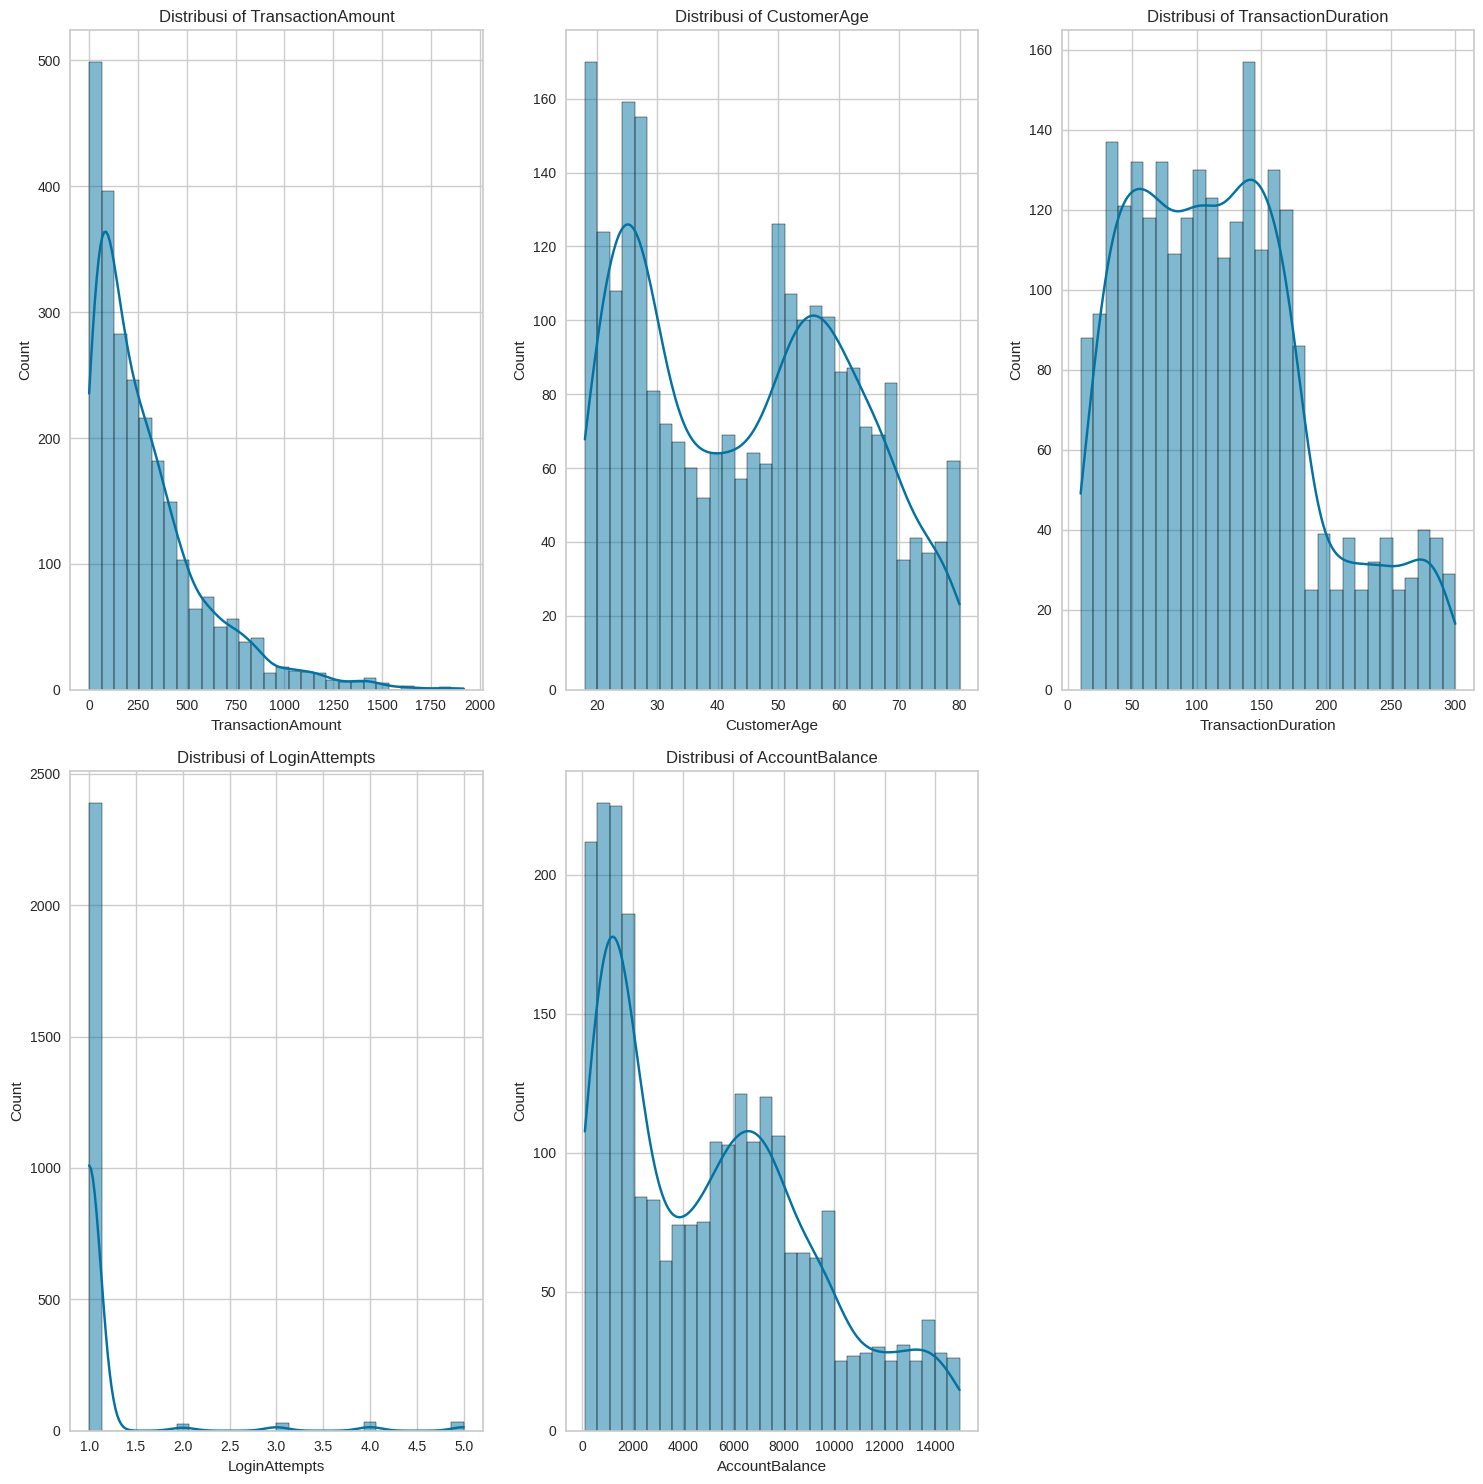

In [10]:
# Distribusi Variabel Numerik dengan Histogram
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

plt.figure(figsize=(15, 15))
for i, column in enumerate(kolom_numerik, 1):
  plt.subplot(2, 3, i)
  sns.histplot(data[column], kde=True, bins=30)
  plt.title(f"Distribusi of {column}")

plt.tight_layout()
plt.show()

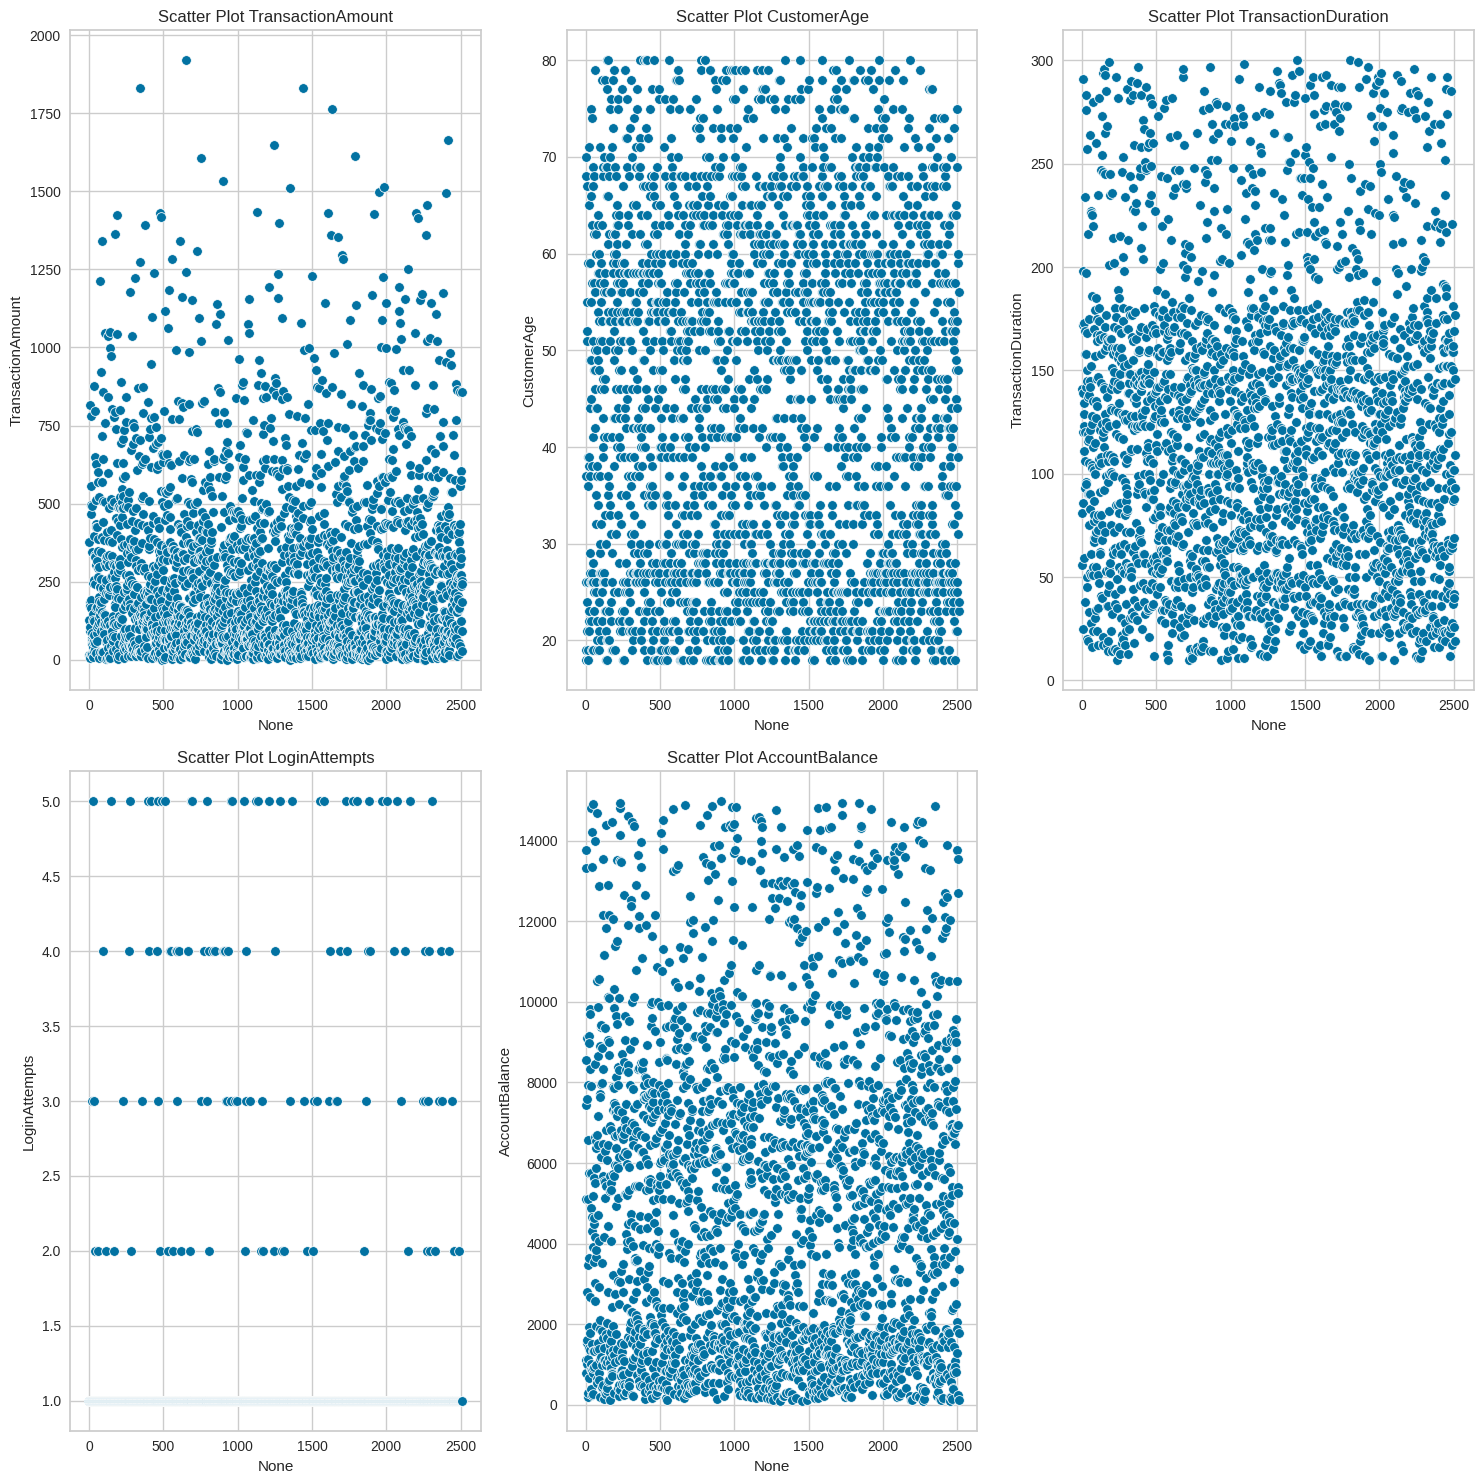

In [11]:
# Hubungan Antara Variabel Numerik dengan Scatter Plot
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

plt.figure(figsize=(15, 15))
for i, column in enumerate(kolom_numerik, 1):
  plt.subplot(2, 3, i)
  sns.scatterplot(x=data.index, y=data[column])
  plt.title(f"Scatter Plot {column}")

plt.tight_layout()
plt.show()

4. **Visualisasi Data**

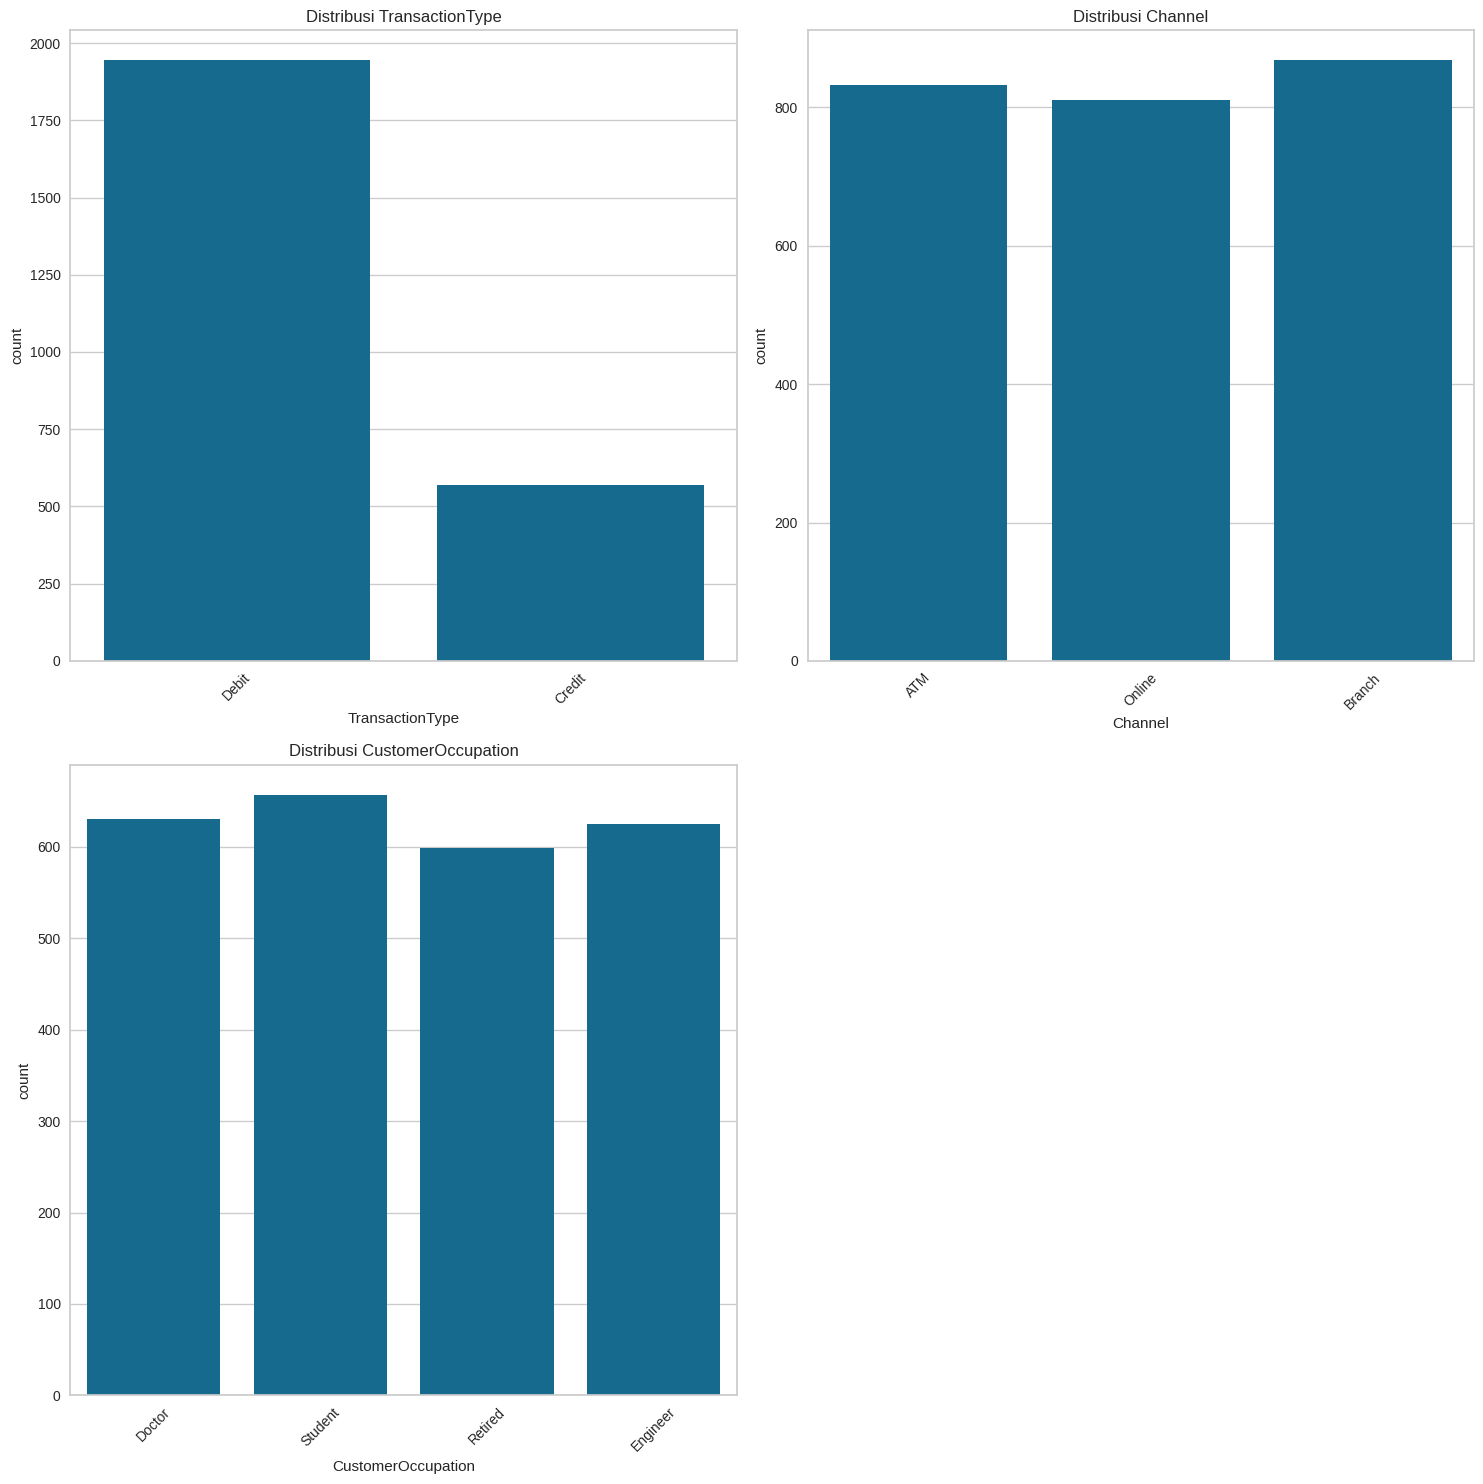

In [12]:
# Visualisasi Dasar Variabel Kategorikal dengan Distribusi Batang (Tipe Transaksi, Channel, dan Pekerjaan Customer)
kolom_kategorikal = ["TransactionType", "Channel", "CustomerOccupation"]

plt.figure(figsize=(15, 15))
for i, column in enumerate(kolom_kategorikal, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=data[column])
  plt.title(f"Distribusi {column}")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

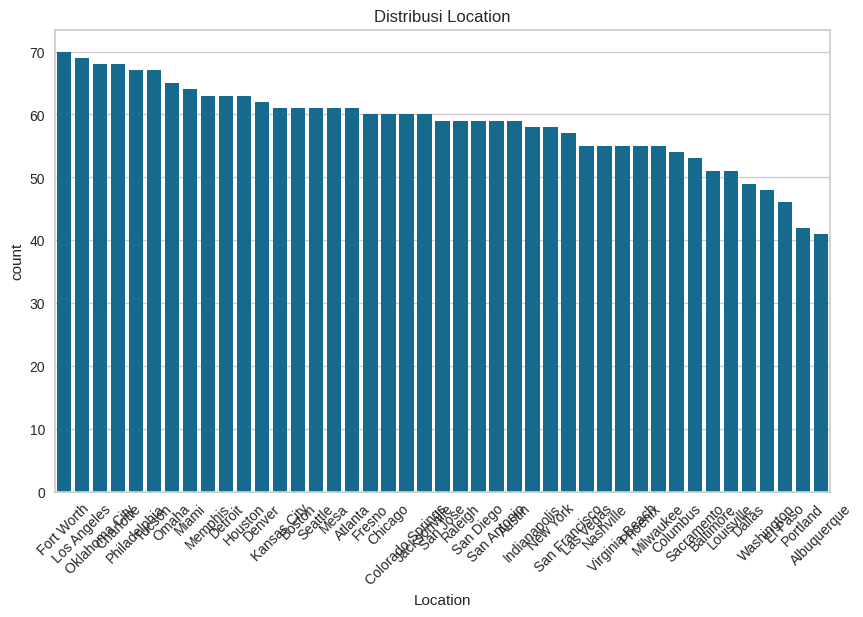

In [13]:
# Visualisasi Dasar Variabel Kategorikal dengan Distribusi Batang (Lokasi)
plt.figure(figsize=(10, 6))
sns.countplot(x=data["Location"], order=data["Location"].value_counts().index)
plt.title("Distribusi Location")
plt.xticks(rotation=45)
plt.show()

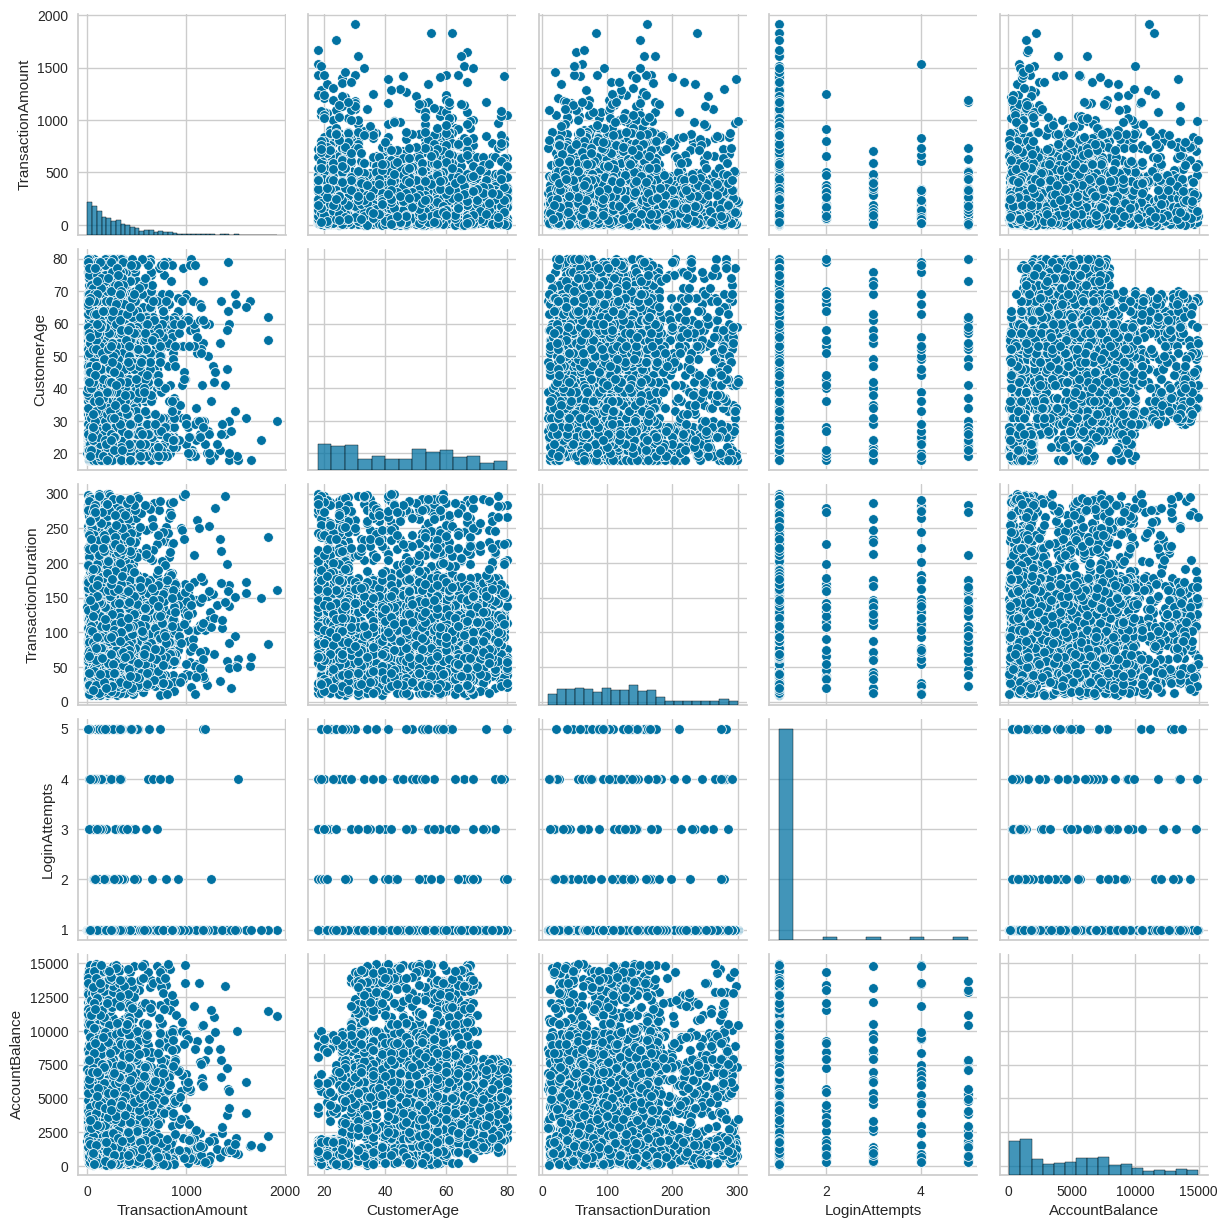

In [14]:
# Analisis Korelasi antar Variabel Numerik dengan Pairplot
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

sns.pairplot(data[kolom_numerik])
plt.show()

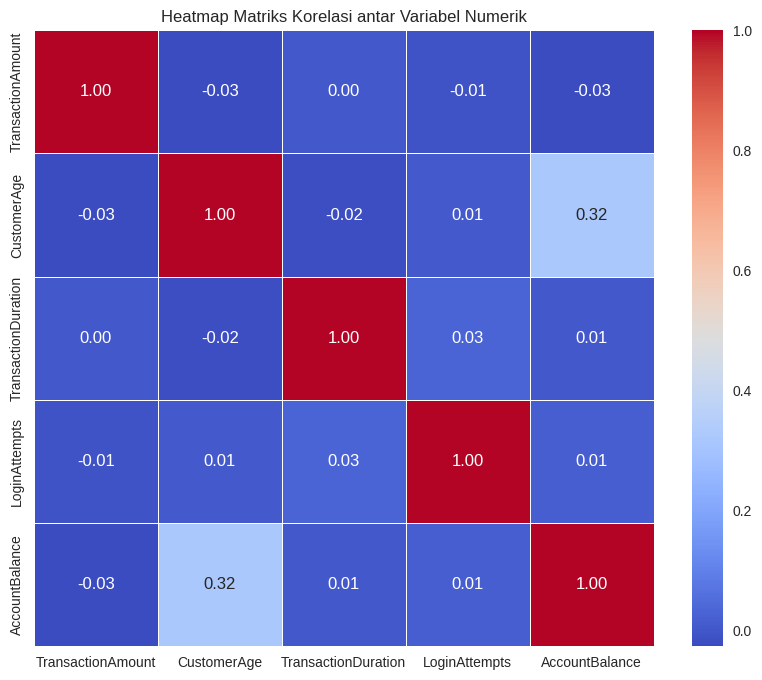

In [15]:
# Analisis Korelasi antar Variabel Numerik dengan Heatmap
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

plt.figure(figsize=(10, 8))
correlation_matrix = data[kolom_numerik].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Matriks Korelasi antar Variabel Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Karena tidak ada data yang missing value dan juga tidak ada data yang duplikat maka saya tidak memasukkan syntax kedua hal tersebut.

**Menghapus Kolom yang Tidak Relevan**

In [16]:
# Menghapus Kolom yang Dianggap Tidak Berkontribusi dalam Prediksi
data_drop = data.drop(columns=["TransactionID", "AccountID", "TransactionDate", "PreviousTransactionDate", "DeviceID", "IP Address", "MerchantID"])

# Menampilkan DataFrame yang Telah Dihapus Kolomnya
data_drop.head()

# Menampilkan Tipe Data setelah Menghapus Kolom
print(data_drop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 176.8+ KB
None


**Mendeteksi dan Penanganan Outlier**

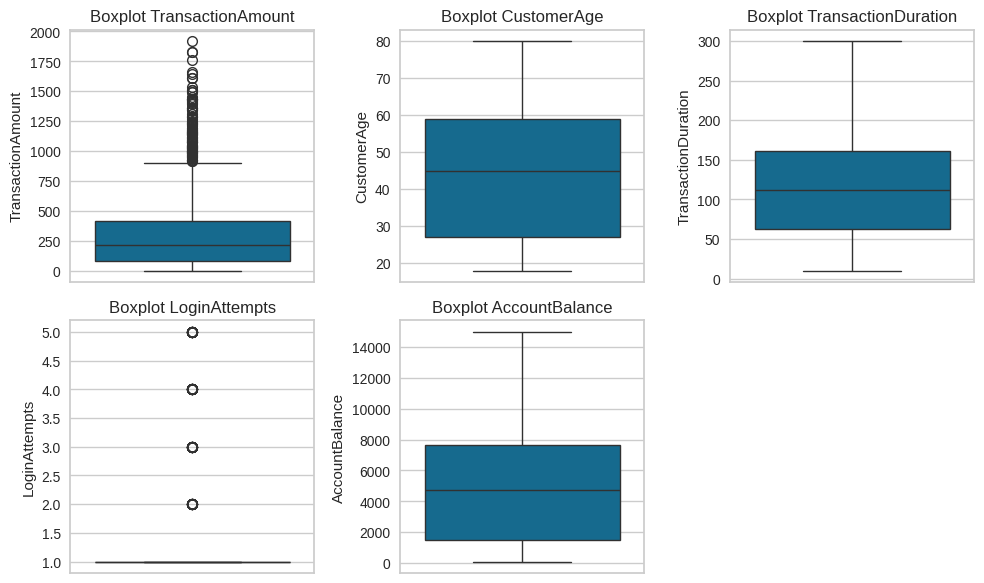

In [17]:
# Memeriksa Outlier dengan Boxplot Sebelum Penanganan
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

plt.figure(figsize=(10,6))
for i, column in enumerate(kolom_numerik, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(y=data[column])
  plt.title(f"Boxplot {column}")
  plt.ylabel(column)

plt.tight_layout()
plt.show()

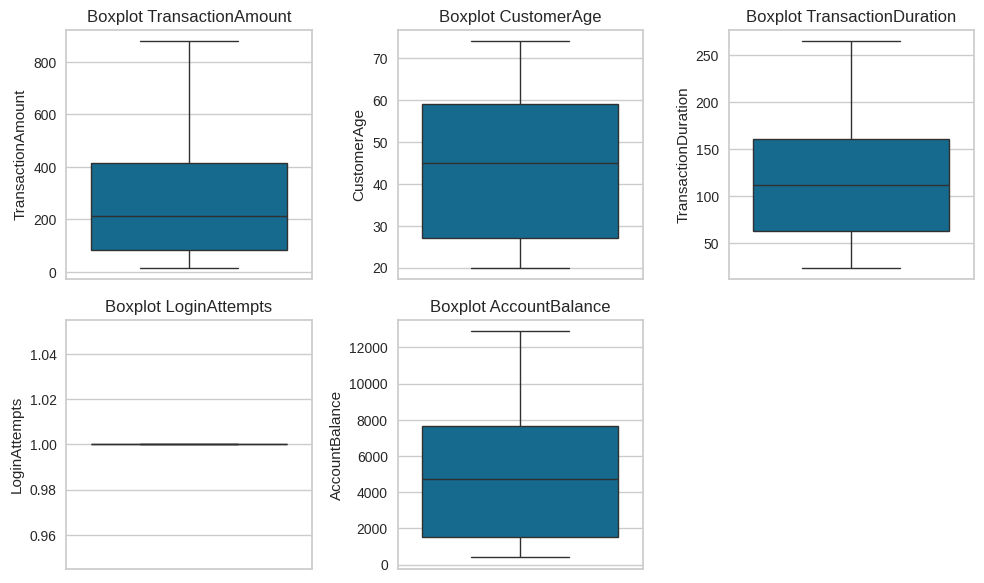

In [18]:
# Menangani Outlier dengan Metode IQR dan Winsorizing
for column in kolom_numerik:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Winsorizing dengan Membatasi Nilai Outlier ke Persentil ke-5 dan ke-95
    data[column] = np.clip(data[column], data[column].quantile(0.05), data[column].quantile(0.95))

# Memeriksa Outlier dengan Boxplot Sesudah Penanganan
plt.figure(figsize=(10,6))
for i, column in enumerate(kolom_numerik, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(y=data[column])
  plt.title(f"Boxplot {column}")
  plt.ylabel(column)

plt.tight_layout()
plt.show()

**Binning (Pengelompokan Data)**

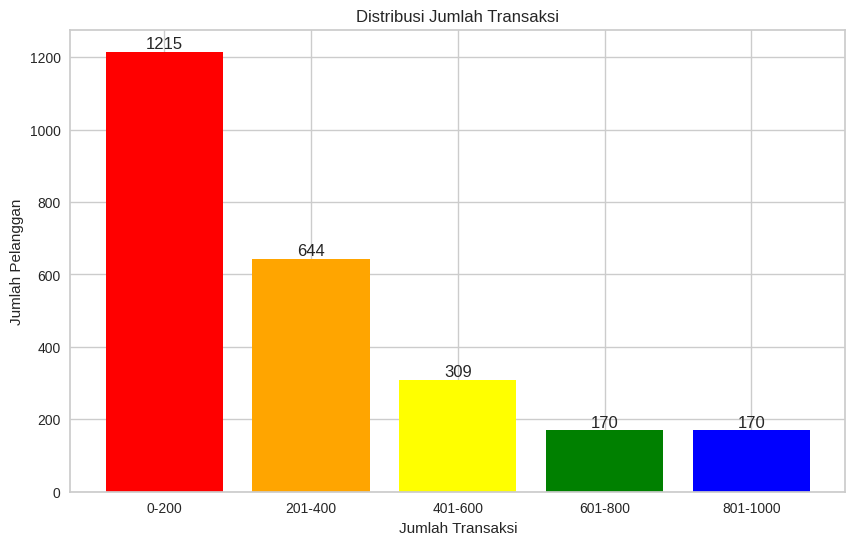

In [19]:
# Binning Kolom TransactionAmount dengan Mengelompokkan Jumlah Transaksi ke dalam Kategori dan Menghitung Jumlah Transaksi di setiap Kategori
transamo0_200 = data.TransactionAmount[(data.TransactionAmount >= 0) & (data.TransactionAmount <= 200)]
transamo201_400 = data.TransactionAmount[(data.TransactionAmount >= 201) & (data.TransactionAmount <= 400)]
transamo401_600 = data.TransactionAmount[(data.TransactionAmount >= 401) & (data.TransactionAmount <= 600)]
transamo601_800 = data.TransactionAmount[(data.TransactionAmount >= 601) & (data.TransactionAmount <= 800)]
transamo801_1000 = data.TransactionAmount[(data.TransactionAmount >= 801) & (data.TransactionAmount <= 1000)]

# Menyusun Data untuk Plotting
x = ["0-200", "201-400", "401-600", "601-800", "801-1000"]
y = [len(transamo0_200.values), len(transamo201_400.values), len(transamo401_600.values), len(transamo601_800.values), len(transamo801_1000.values)]

# Membuat Diagram Batang untuk Distribusi Jumlah Transaksi
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=["red", "orange", "yellow", "green", "blue"])
plt.title("Distribusi Jumlah Transaksi")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Jumlah Pelanggan")

# Menambahkan Label Jumlah Pelanggan di atas Setiap Diagram Batang
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.show()

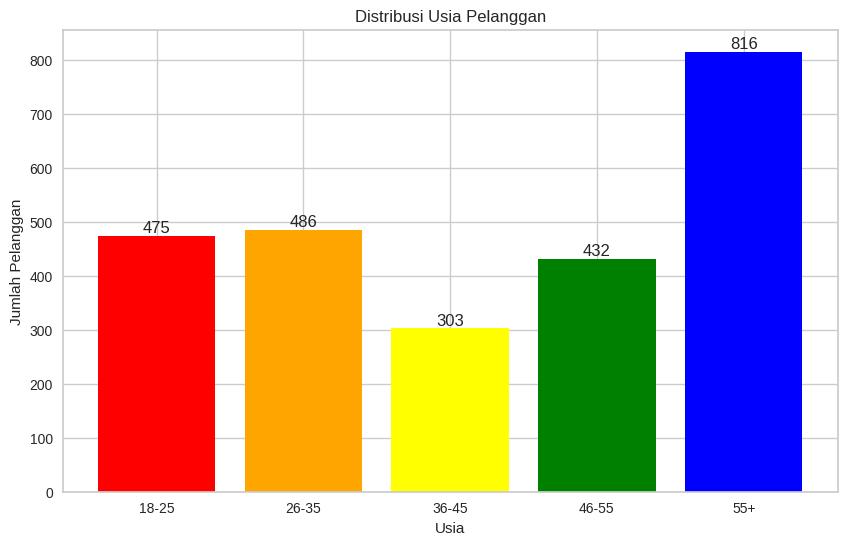

In [20]:
# Binning Kolom CustomerAge dengan Mengelompokkan Usia Pelanggan ke dalam Kategori dan Menghitung Jumlah Pelanggan di setiap Kategori
age18_25 = data.CustomerAge[(data.CustomerAge >= 18) & (data.CustomerAge <= 25)]
age26_35 = data.CustomerAge[(data.CustomerAge >= 26) & (data.CustomerAge <= 35)]
age36_45 = data.CustomerAge[(data.CustomerAge >= 36) & (data.CustomerAge <= 45)]
age46_55 = data.CustomerAge[(data.CustomerAge >= 46) & (data.CustomerAge <= 55)]
age55atas = data.CustomerAge[data.CustomerAge >= 56]

# Menyusun Data untuk Plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55atas.values)]

# Membuat Diagram Batang untuk Distribusi Usia Pelanggan
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=["red", "orange", "yellow", "green", "blue"])
plt.title("Distribusi Usia Pelanggan")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")

# Menambahkan Label Jumlah Pelanggan di atas Setiap Diagram Batang
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.show()

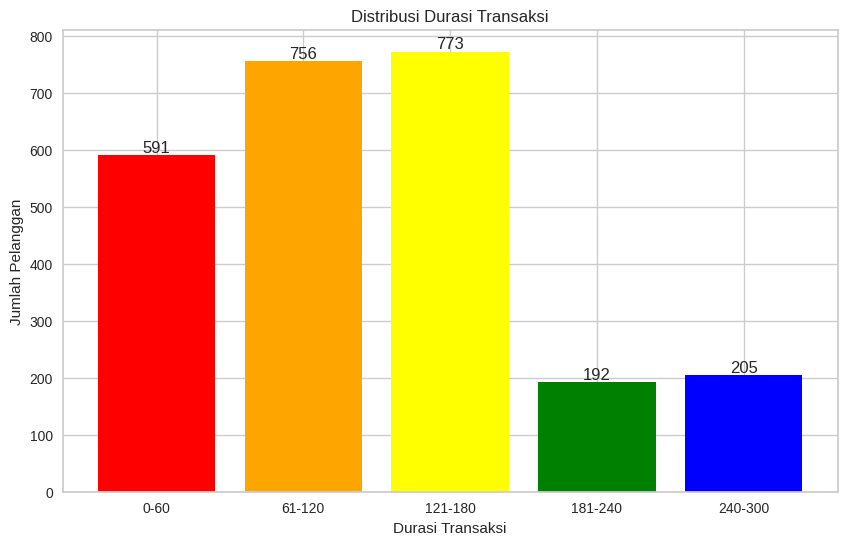

In [21]:
# Binning Kolom TransactionDuration dengan Mengelompokkan Durasi Transaksi ke dalam Kategori dan Menghitung Durasi Transaksi di setiap Kategori
transdur0_60 = data.TransactionDuration[(data.TransactionDuration >= 0) & (data.TransactionDuration <= 60)]
transdur61_120 = data.TransactionDuration[(data.TransactionDuration >= 61) & (data.TransactionDuration <= 120)]
transdur121_180 = data.TransactionDuration[(data.TransactionDuration >= 121) & (data.TransactionDuration <= 180)]
transdur181_240 = data.TransactionDuration[(data.TransactionDuration >= 181) & (data.TransactionDuration <= 240)]
transdur240_300 = data.TransactionDuration[(data.TransactionDuration >= 240) & (data.TransactionDuration <= 300)]

# Menyusun Data untuk Plotting
x = ["0-60", "61-120", "121-180", "181-240", "240-300"]
y = [len(transdur0_60.values), len(transdur61_120.values), len(transdur121_180.values), len(transdur181_240.values), len(transdur240_300.values)]

# Membuat Diagram Batang untuk Distribusi Durasi Transaksi
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=["red", "orange", "yellow", "green", "blue"])
plt.title("Distribusi Durasi Transaksi")
plt.xlabel("Durasi Transaksi")
plt.ylabel("Jumlah Pelanggan")

# Menambahkan Label Jumlah Pelanggan di atas Setiap Diagram Batang
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.show()

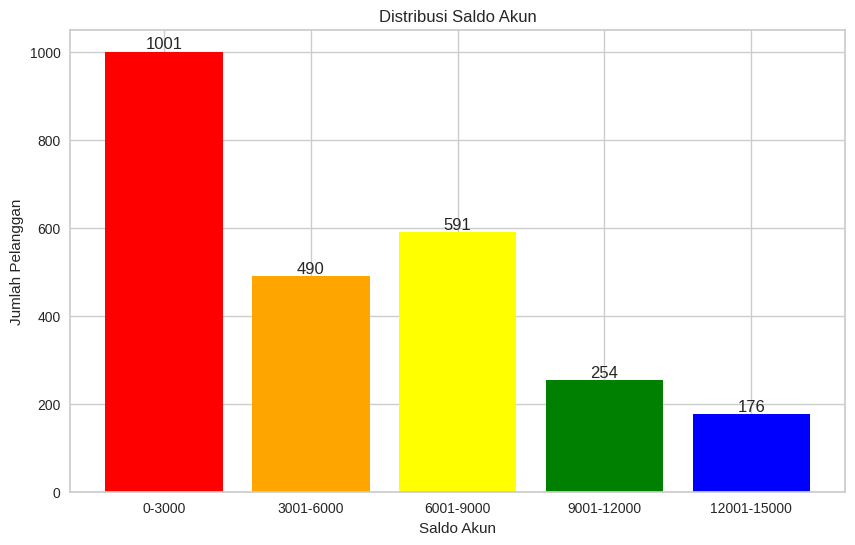

In [22]:
# Binning Kolom AccountBalance dengan Mengelompokkan Saldo Akun ke dalam Kategori dan Menghitung Saldo Akun di setiap Kategori
accbal0_3000 = data.AccountBalance[(data.AccountBalance >= 0) & (data.AccountBalance <= 3000)]
accbal3001_6000 = data.AccountBalance[(data.AccountBalance >= 3001) & (data.AccountBalance <= 6000)]
accbal6001_9000 = data.AccountBalance[(data.AccountBalance >= 6001) & (data.AccountBalance <= 9000)]
accbal9001_12000 = data.AccountBalance[(data.AccountBalance >= 9001) & (data.AccountBalance <= 12000)]
accbal12001_15000 = data.AccountBalance[(data.AccountBalance >= 12001) & (data.AccountBalance <= 15000)]

# Menyusun Data untuk Plotting
x = ["0-3000", "3001-6000", "6001-9000", "9001-12000", "12001-15000"]
y = [len(accbal0_3000.values), len(accbal3001_6000.values), len(accbal6001_9000.values), len(accbal9001_12000.values), len(accbal12001_15000.values)]

# Membuat Diagram Batang untuk Distribusi Saldo Akun
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=["red", "orange", "yellow", "green", "blue"])
plt.title("Distribusi Saldo Akun")
plt.xlabel("Saldo Akun")
plt.ylabel("Jumlah Pelanggan")

# Menambahkan Label Jumlah Pelanggan di atas Setiap Diagram Batang
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.show()

**Normalisasi atau Standarisasi Fitur**

In [23]:
# Standarisasi Fitur Numerik dengan StandardScaler
scaler = StandardScaler()
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]
data[kolom_numerik] = scaler.fit_transform(data[kolom_numerik])
print("StandardScaler:\n", data[kolom_numerik])
data.describe()

StandardScaler:
       TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
0             -1.079861     1.462422            -0.565240        0.011233
1              0.374143     1.347393             0.323511        2.073241
2             -0.635325    -1.413287            -0.935553       -1.045143
3             -0.400234    -1.068202            -1.394741        0.926487
4             -1.079861    -1.068202             1.167824        0.624745
...                 ...          ...                  ...             ...
2507           2.312589    -0.665603            -0.150490        2.017778
2508          -0.129480     0.197110             0.856761       -1.238983
2509          -1.029743     0.657223             0.397573       -0.446625
2510          -0.394297    -1.240745            -1.409554       -0.871839
2511          -0.163648    -1.183231            -0.387490       -1.238983

[2512 rows x 4 columns]


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2.512000e+03,2.512000e+03,2.512000e+03,2512.0,2.512000e+03
mean,1.343582e-16,-8.627211e-17,-4.525750e-17,1.0,-2.517448e-16
std,1.000199e+00,1.000199e+00,1.000199e+00,0.0,1.000199e+00
min,-1.079861e+00,-1.413287e+00,-1.409554e+00,1.0,-1.238983e+00
25%,-8.146629e-01,-1.010688e+00,-8.318656e-01,1.0,-9.439977e-01
50%,-2.926432e-01,2.456716e-02,-9.864595e-02,1.0,-8.850396e-02
75%,5.287741e-01,8.297656e-01,6.197612e-01,1.0,6.907823e-01
max,2.401315e+00,1.692478e+00,2.160263e+00,1.0,2.073241e+00


**Encoding Data Kategorikal**

In [25]:
# Menampilkan Informasi Awal Data
print("Data sebelum encoding: ")
data.head()

Data sebelum encoding: 


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-1.079861,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.462422,Doctor,-0.565240,1,0.011233,2024-11-04 08:08:08
1,TX000002,AC00455,0.374143,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.347393,Doctor,0.323511,1,2.073241,2024-11-04 08:09:35
2,TX000003,AC00019,-0.635325,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.413287,Student,-0.935553,1,-1.045143,2024-11-04 08:07:04
3,TX000004,AC00070,-0.400234,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.068202,Student,-1.394741,1,0.926487,2024-11-04 08:09:06
4,TX000005,AC00411,-1.079861,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.068202,Student,1.167824,1,0.624745,2024-11-04 08:06:39


In [26]:
# Menggunakan One-Hot Encoding
kolom_kategorik = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
data_one_hot = pd.get_dummies(data, columns=kolom_kategorik, dtype=int)
print("Data sesudah encoding: ")
data_one_hot.head()

Data sesudah encoding: 


,TransactionID,AccountID,TransactionAmount,TransactionDate,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,...,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,-1.079861,2023-04-11 16:29:14,D000380,162.198.218.92,M015,1.462422,-0.565240,1,...,0,0,0,1,0,0,1,0,0,0
1,TX000002,AC00455,0.374143,2023-06-27 16:44:19,D000051,13.149.61.4,M052,1.347393,0.323511,1,...,0,0,0,1,0,0,1,0,0,0
2,TX000003,AC00019,-0.635325,2023-07-10 18:16:08,D000235,215.97.143.157,M009,-1.413287,-0.935553,1,...,0,0,0,0,0,1,0,0,0,1
3,TX000004,AC00070,-0.400234,2023-05-05 16:32:11,D000187,200.13.225.150,M002,-1.068202,-1.394741,1,...,0,0,0,0,0,1,0,0,0,1
4,TX000005,AC00411,-1.079861,2023-10-16 17:51:24,D000308,65.164.3.100,M091,-1.068202,1.167824,1,...,0,0,0,0,0,1,0,0,0,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Algoritma clustering yang akan saya gunakan adakah K-Means Clustering.

In [27]:
# Memilih Fitur yang telah Melalui Proses Standarisasi dan Encoding
fitur_terpilih = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance", "TransactionType_Debit", "TransactionType_Credit", "Channel_ATM", "Channel_Branch", "Channel_Online", "CustomerOccupation_Doctor", "CustomerOccupation_Engineer", "CustomerOccupation_Retired", "CustomerOccupation_Student"]
fitur_tersedia = data.columns.intersection(fitur_terpilih)
X = data[fitur_tersedia].values
print("Fitur yang tersedia: ", fitur_tersedia)
print("Fitur yang terpilih: ", fitur_terpilih)

# Standarisasi Kembali Sebelum Membangun Model K-Means Supaya Skalanya Sama
scaler = StandardScaler()
X_terpilih = scaler.fit_transform(X)

Fitur yang tersedia:  Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')
Fitur yang terpilih:  ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType_Debit', 'TransactionType_Credit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online', 'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer', 'CustomerOccupation_Retired', 'CustomerOccupation_Student']


In [28]:
# Membangun dan Melatih Model K-Means dengan Jumlah Cluster 5
model_kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data["ClusterKMeans"] = model_kmeans.fit_predict(X_terpilih)

# Mendapatkan Label CLuster dan Menghitung Distribusi
unique_labels, counts = np.unique(data["ClusterKMeans"], return_counts=True)

# Mendapatkan Label Cluster
print("Distribusi Data Setiap Cluster: ")
for label, count in zip(unique_labels, counts):
  print(f"Cluster {label}: {count}")

print(data["ClusterKMeans"].dtype)

Distribusi Data Setiap Cluster: 
Cluster 0: 371
Cluster 1: 645
Cluster 2: 597
Cluster 3: 504
Cluster 4: 395
int32


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

**Elbow Method**

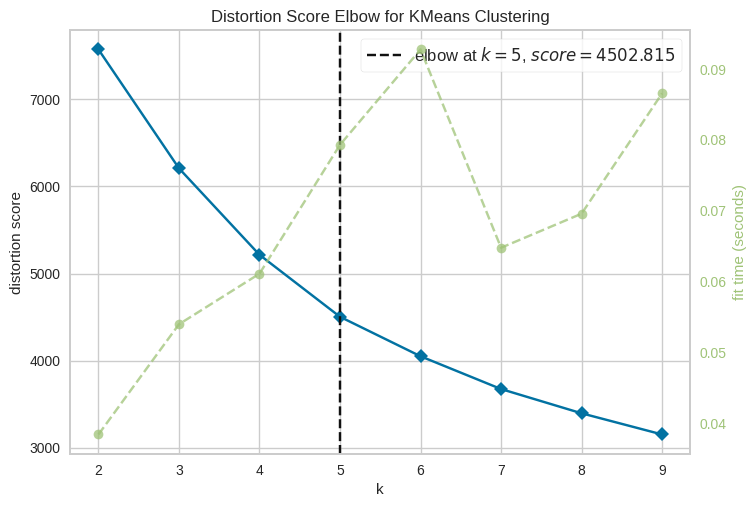

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Inisialisasi Model KMeans Tanpa Parameter Awal
kmeans = KMeans(random_state=42, n_init=10)

#Inisialisasi Visualizer KElbow untuk Menentukan Jumlah Cluster Optimal
visualizer = KElbowVisualizer(kmeans, k=(2,10)) #mencoba jumlah cluster dari 2 hingga 10

# Fit Visualizer ke Data untuk Menemukan Jumlah Cluster Optimal
visualizer.fit(X)

# Menampilkan Grafik Elbow Method
visualizer.show()

Hasil evaluasi model cluster menggunakan Elbow Method menunjukkan bahwa jumlah cluster optimal adalah 5 dengan nilai total within-cluster sum of squares (WCSS) sebesar 4502.815. Hal ini menunjukkan  bahwa membagi data menjadi 5 cluster dapat memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.

**Silhouette Score**

Jumlah Cluster: 2, Silhouette Score: 0.2457
Jumlah Cluster: 3, Silhouette Score: 0.2525
Jumlah Cluster: 4, Silhouette Score: 0.2459
Jumlah Cluster: 5, Silhouette Score: 0.2539
Jumlah Cluster: 6, Silhouette Score: 0.2362
Jumlah Cluster: 7, Silhouette Score: 0.2465
Jumlah Cluster: 8, Silhouette Score: 0.2398
Jumlah Cluster: 9, Silhouette Score: 0.2437
Jumlah Cluster: 10, Silhouette Score: 0.2537


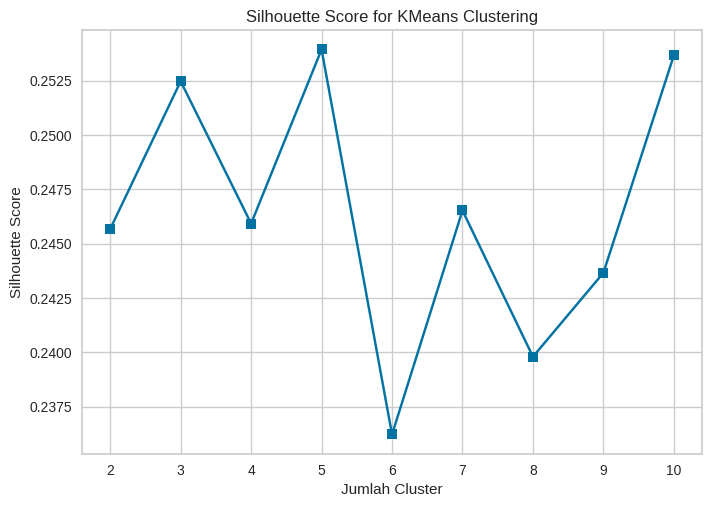

<Figure size 1000x600 with 0 Axes>

Cluster Optimal Silhouette Score pada k: 3


In [30]:
# List untuk Menyimpan Silhouette Score
silhouette_scores = []

# Mencoba Jumlah Cluster dari 2 hingga 10
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X)
  score = silhouette_score(X, labels)
  silhouette_scores.append(score)
  print(f"Jumlah Cluster: {i}, Silhouette Score: {score:.4f}")

# Visualisasi Silhouette Score untuk Setiap Jumlah Cluster
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for KMeans Clustering")
plt.plot(range(2, 11), silhouette_scores, marker="s", linestyle="-")
plt.figure(figsize=(10, 6))
plt.show()

# Mendapatkan Nilai k Optimal
k_optimal_sil = silhouette_scores.index(max(silhouette_scores))
print(f"Cluster Optimal Silhouette Score pada k: {k_optimal_sil}")

Hasil evaluasi model cluster menggunakan Silhouette Score menunjukkan bahwa semua skor pada setiap cluster masih di bawah 0.7. Hal ini menunjukkan bahwa klasterisasi masih belum begitu kuat sehingga perlu dicari pendekatan lain untuk menaikkan silhouette score tersebut.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
# Memasukkan Kembali Fitur pada Pembangunan Model Clustering
fitur_terpilih = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance", "TransactionType_Debit", "TransactionType_Credit", "Channel_ATM", "Channel_Branch", "Channel_Online", "CustomerOccupation_Doctor", "CustomerOccupation_Engineer", "CustomerOccupation_Retired", "CustomerOccupation_Student"]

# Menggunakan Data yang Sudah Diencoding
X = data_one_hot[fitur_terpilih]

# Standarisasi Fitur Numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pembangunan Model Clustering Awal Sebelum Feature Selection
k_optimal = 5 #sesuai hasil Elbow Method sebelumnya
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_sebelum = kmeans.fit_predict(X_scaled)

# Evaluasi Clustering dengan Silhouette Score
silhouette_score_sebelum = silhouette_score(X_scaled, labels_sebelum)
print(f"Silhouette Score Sebelum Memulai Feature Selection: {silhouette_score_sebelum:.4f}")

Silhouette Score Sebelum Memulai Feature Selection: 0.2623


Fitur yang Terpilih Berdasarkan Random Forest: Index(['CustomerOccupation_Retired', 'CustomerOccupation_Engineer',
       'CustomerOccupation_Doctor', 'TransactionType_Debit',
       'TransactionType_Credit'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


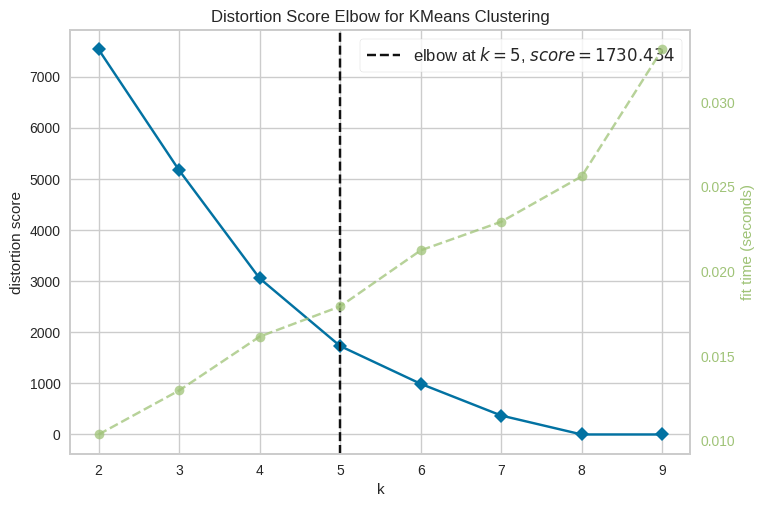

Silhouette Score Setelah Memulai Feature Selection: 0.8547
Perbandingan Performa Model: 
Silhouette Score Sebelum Feature Selection: 0.2623
Silhouette Score Sesudah Feature Selection: 0.8547


In [32]:
# Feature Selection dengan RandomForest
from sklearn.ensemble import RandomForestClassifier

# Mencari Fitur Penting dengan Random Forest
randomf = RandomForestClassifier(random_state=42)
randomf.fit(X_scaled, labels_sebelum)

# Mendapakan Fitur yang Penting
fitur_penting = randomf.feature_importances_

# Memilih Fitur Terbaik
k_terbaik = 5
fitur_terbaik = np.argsort(fitur_penting)[-k_terbaik:]
nama_fitur_terpilih = X.columns[fitur_terbaik]
print(f"Fitur yang Terpilih Berdasarkan Random Forest: {nama_fitur_terpilih}")

# Membuat Dataset dengan Fitur Terpilih
X_terpilih_randomf =X[nama_fitur_terpilih]

# Standarisasi Kembali Setelah Feature Selection
scaler = StandardScaler()
X_terpilih_scaled = scaler.fit_transform(X_terpilih_randomf)

# Optimasi Jumlah Cluster dengan Elbow Method
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_terpilih_scaled)
visualizer.show()
k_optimal = visualizer.elbow_value_  #menggunakan nilai k optimal dari Elbow Method

# Pembangunan Model Clustering Ulang Setelah Feature Selection
kmeans_terpilih_randomf = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_sesudah_randomf = kmeans_terpilih_randomf.fit_predict(X_terpilih_randomf)

# Evaluasi Ulang Clustering dengan Silhouette Score
silhouette_score_sesudah_randomf = silhouette_score(X_terpilih_randomf, labels_sesudah_randomf)
print(f"Silhouette Score Setelah Memulai Feature Selection: {silhouette_score_sesudah_randomf:.4f}")

# Perbandingan Silhouette Score Sebelum dan Sesudah Feature Selection
print(f"Perbandingan Performa Model: ")
print(f"Silhouette Score Sebelum Feature Selection: {silhouette_score_sebelum:.4f}")
print(f"Silhouette Score Sesudah Feature Selection: {silhouette_score_sesudah_randomf:.4f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

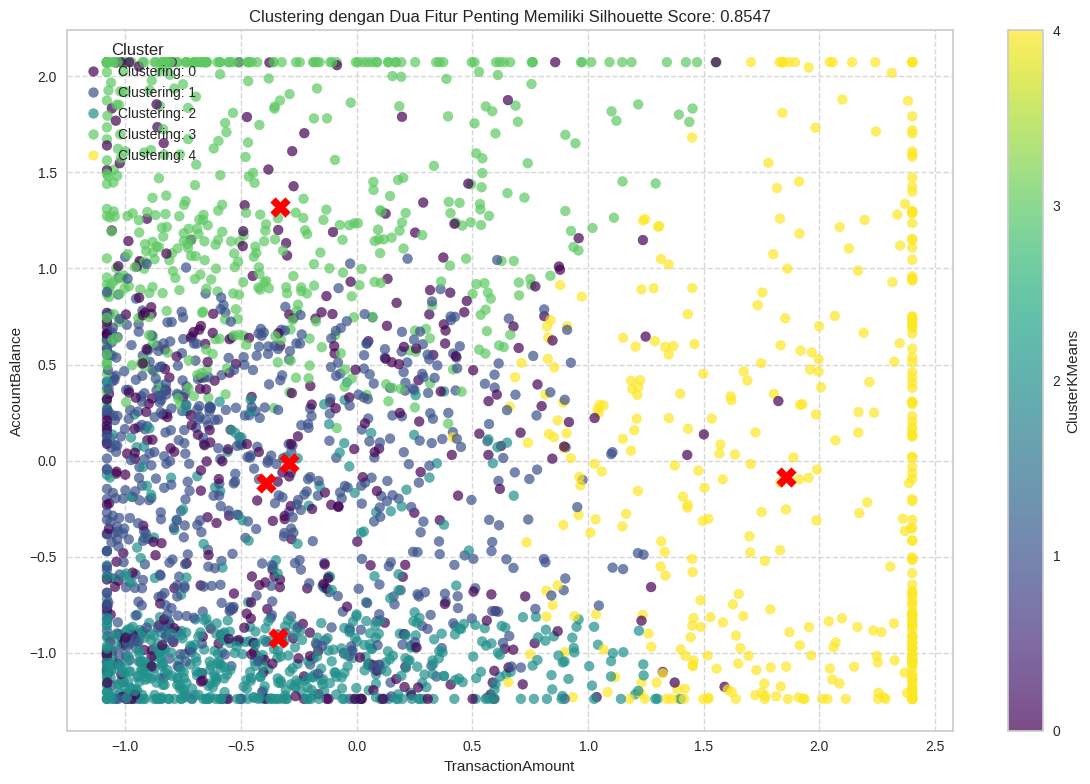

In [33]:
# Mengecek Apakah Jumlah Fitur Cukup untuk Dilakukan Visualisasi dengan Minimal 2 Fitur
if len(fitur_terpilih) >= 2:

    # Membuat Figure untuk Plot
    plt.figure(figsize=(12, 8))

    # Memilih Dua Kolom Numerik yang ingin Divisualisasikan
    kolom_x = "TransactionAmount"
    kolom_y = "AccountBalance"

    # Mendapatkkan Indeks dari Fitur Dua Kolom Numerik
    indeks_x = fitur_terpilih.index(kolom_x)
    indeks_y = fitur_terpilih.index(kolom_y)

    # Membuat Scatter Plot Berdasarkan Clustering
    scatter_p = plt.scatter(X_terpilih[:, indeks_x], X_terpilih[:, indeks_y], c=data["ClusterKMeans"], cmap='viridis', s=50, alpha=0.7)

    # Memasukkan Centroid dari Setiap Cluster
    centroids = data_one_hot.groupby(data["ClusterKMeans"])[fitur_terpilih].mean()

    # Membuat Plot Centroid
    plt.scatter(centroids[kolom_x], centroids[kolom_y], c='red', marker='X', s=200, alpha=1, label='Centroids')

    # Menambah Label dan Judul pada Plot
    plt.xlabel(kolom_x)
    plt.ylabel(kolom_y)
    plt.title(f'Clustering dengan Dua Fitur Penting Memiliki Silhouette Score: {silhouette_score_sesudah_randomf:.4f}')

    # Menambah Warna untuk Menunjukkan Skala Warna Setiap Cluster
    clr_b = plt.colorbar(scatter_p, label="ClusterKMeans")
    clr_b.set_ticks(np.arange(data["ClusterKMeans"].nunique()))  #set_ticks sesuai jumlah cluster
    clr_b.set_ticklabels(np.arange(data["ClusterKMeans"].nunique()))  #tickslabels sesuai nomor cluster

    # Membuat Legend untuk Cluster
    handles, labels = scatter_p.legend_elements(prop="colors", alpha=0.7)
    labels_legend = [f"Clustering: {i}" for i in range(data["ClusterKMeans"].nunique())]
    plt.legend(handles, labels_legend, title="Cluster", loc="upper left", bbox_to_anchor=(0, 1))

    # Menambah Grid pada Plot
    plt.grid(True, linestyle='--', alpha=0.8)

    # Memperbaiki Layout
    plt.tight_layout()

    # Menampilkan Plot
    plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [34]:
# Memuat 5 Baris Pertama Dataset setelah Clustering
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,ClusterKMeans
0,TX000001,AC00128,-1.079861,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.462422,Doctor,-0.565240,1,0.011233,2024-11-04 08:08:08,1
1,TX000002,AC00455,0.374143,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.347393,Doctor,0.323511,1,2.073241,2024-11-04 08:09:35,3
2,TX000003,AC00019,-0.635325,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.413287,Student,-0.935553,1,-1.045143,2024-11-04 08:07:04,2
3,TX000004,AC00070,-0.400234,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.068202,Student,-1.394741,1,0.926487,2024-11-04 08:09:06,3
4,TX000005,AC00411,-1.079861,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.068202,Student,1.167824,1,0.624745,2024-11-04 08:06:39,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [35]:
# Menambah Kolom Cluster ke Data
data["ClusterKMeans"] = model_kmeans.labels_

# Membuat Salinan Data untuk Menyimpan dalam DataFrame Baru
data_invers = data_drop.copy()

**Inverse Transform Fitur Numerik**



In [36]:
# Load Fitur Numerik
kolom_numerik
data[kolom_numerik].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   CustomerAge          2512 non-null   float64
 2   TransactionDuration  2512 non-null   float64
 3   AccountBalance       2512 non-null   float64
dtypes: float64(4)
memory usage: 78.6 KB


In [37]:
# Mengembalikan Fitur Numerik ke Nilai Asli
scaler = StandardScaler()
data_invers[kolom_numerik] = scaler.fit_transform(data_drop[kolom_numerik])
data_invers[kolom_numerik] = scaler.inverse_transform(data_invers[kolom_numerik])

**Inverse Transform Fitur Kategorik**

In [38]:
# Load Fitur Kategorik
kolom_kategorik

['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

In [39]:
# Loop Setiap Kolom Kategorik yang Telah Diencode
for col in kolom_kategorik:
  # Mengambil Kolom Hasil One_Hot Encoded
  kolom_encoded = [c for c in data_invers.columns if c.startswith(col + "_")]

  # Mengecek Apakah Ada Kolom Hasil Encoding
  if kolom_encoded:
    # Mengembalikan Hasil Encoding ke Kategori Asli
    data_invers[col] = data_invers[kolom_encoded].idxmax(axis=1).str.replace(col + "_", "")

    # Menghapus Kolom Encoding Setelah Berhasil Kembali ke Bentuk Asli
    data_invers.drop(columns=kolom_encoded, inplace=True)
  else:
    # Menampilkan Peringatan untuk Kolom yang Tidak Memiliki Encoded
    print(f"Peringatan: Tidak ditemukan kolom encoded untuk {col}. Lewati inverse transform")

Peringatan: Tidak ditemukan kolom encoded untuk TransactionType. Lewati inverse transform
Peringatan: Tidak ditemukan kolom encoded untuk Location. Lewati inverse transform
Peringatan: Tidak ditemukan kolom encoded untuk Channel. Lewati inverse transform
Peringatan: Tidak ditemukan kolom encoded untuk CustomerOccupation. Lewati inverse transform


In [41]:
# Menampilkan 5 Baris Data Pertama Setelah Clustering dan Invers Transform
data_drop.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [42]:
# Memilih Fitur yang Ingin Dianalisis Karakteristiknya
fitur_terpilih_an = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]

# Memasukkan Ringkasan Statistik Fitur yang Terpilih untuk Karakteristik
data_drop["ClusterKMeans"] = data["ClusterKMeans"]
summary_cluster = data_drop.groupby("ClusterKMeans")[fitur_terpilih_an].agg(["count", "mean", "min", "max"]).reset_index()

# Menampilkan Ringkasan Karakteristik
print("Ringkasan Statistik Cluster: ")
print(summary_cluster)

Ringkasan Statistik Cluster: 
  ClusterKMeans TransactionAmount                              CustomerAge  \
                            count        mean     min      max       count   
0             0               371  210.192642    1.21   734.86         371   
1             1               645  185.946434    0.84   590.57         645   
2             2               597  199.270955    0.26   630.24         597   
3             3               504  200.787044    0.32   668.67         504   
4             4               395  834.119544  386.38  1919.11         395   

                     TransactionDuration                       AccountBalance  \
        mean min max               count        mean  min  max          count   
0  44.959569  18  80                 371  235.072776  152  300            371   
1  62.403101  40  80                 645   91.244961   10  202            645   
2  25.753769  18  48                 597   96.651591   10  212            597   
3  44.736111  18  

Tulis hasil interpretasinya di sini.
1. Cluster 0: Didapatkan variabel Jumlah Transaksi memiliki nilai rata-rata 210.19 dengan batas minimum 1.21 dan batas maksimum 734.86, variabel Usia Pelanggan memiliki rata-rata 44.95 dengan batas minimum 18 dan batas maksimum 80, variabel Durasi Transaksi memiliki rata-rata 235.07 dengan batas minimum 152 dan batas maksimum 300, serta variabel Saldo Akun memiliki nilai rata-rata 5031.83 dengan batas minimum 135.96 dan batas maksimum 14928.35.

2. Cluster 1: Didapatkan variabel Jumlah Transaksi memiliki nilai rata-rata 185.94 dengan batas minimum 0.84 dan batas maksimum 590.57, variabel Usia Pelanggan memiliki rata-rata 62.40 dengan batas minimum 40 dan batas maksimum 80, variabel Durasi Transaksi memiliki rata-rata 91.24 dengan batas minimum 10 dan batas maksimum 202, serta variabel Saldo Akun memiliki nilai rata-rata 4622.53 dengan batas minimum 120.89 dan batas maksimum 9073.17.

3. Cluster 2: Didapatkan variabel Jumlah Transaksi memiliki nilai rata-rata 199.27 dengan batas minimum 0.26 dan batas maksimum 630.24, variabel Usia Pelanggan memiliki rata-rata 25.7 dengan batas minimum 18 dan batas maksimum 48, variabel Durasi Transaksi memiliki rata-rata 96.65 dengan batas minimum 10 dan batas maksimum 212, serta variabel Saldo Akun memiliki nilai rata-rata 1567.46 dengan batas minimum 101.25 dan batas maksimum 6611.26.

4. Cluster 3: Didapatkan variabel Jumlah Transaksi memiliki nilai rata-rata 200.78 dengan batas minimum 0.32 dan batas maksimum 668.67, variabel Usia Pelanggan memiliki rata-rata 44.73 dengan batas minimum 18 dan batas maksimum 70, variabel Durasi Transaksi memiliki rata-rata 100.25 dengan batas minimum 10 dan batas maksimum 225, serta variabel Saldo Akun memiliki nilai rata-rata 10257.42 dengan batas minimum 5677.52 dan batas maksimum 14977.99.

5. Cluster 4: Didapatkan variabel Jumlah Transaksi memiliki nilai rata-rata 834.11 dengan batas mininum 386.38 dan batas maksimum 1919.11, variabel Usia Pelanggan memiliki rata-rata 43.97 dengan batas minimum 18 dan batas maksimum 80, variabel Durasi Transaksi memiliki rata-rata 117.08 dengan batas minimum 10 dan batas maksimum 300, serta variabel Saldo Akun memiliki nilai rata-rata 4793.07 dengan batas minimum 102.20 dan batas maksimum 14935.50.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan hasil rangkuman statistik di atas.

## Cluster 0:
- **Rata-rata Jumlah Pelanggan:** 371
- **Rata-rata Jumlah Transaksi:** 210.19 dengan rentang 1.21 - 734.86
- **Rata-rata Usia Pelanggan:** 44.95 dengan rentang 18 - 80  
- **Rata-rata Durasi Transaksi:** 235.07 dengan rentang 152 - 300
- **Rata-rata Saldo Akun:** 5031.83 dengan rentang 135.96 - 14928.35     
- **Analisis:** Cluster 0 mencakup pelanggan dengan usia pelanggan yang relatif menengah dengan jumlah transaksi sedang dengan saldo akun yang cukup besar dengan durasi transaksi diantara 152 hingga 300 yang menunjukkan pelanggan mungkin melakukan transaksi dengan durasi yang lebih lama yang berarti pelanggan memiliki transaksi yang cukup tinggi dan memiliki saldo akun yang relatif besar.

## Cluster 1:
- **Rata-rata Jumlah Pelanggan:** 645  
- **Rata-rata Jumlah Transaksi:** 185.94 dengan rentang 0.84 - 590.57
- **Rata-rata Usia Pelanggan:** 62.40 dengan rentang 40 - 80  
- **Rata-rata Durasi Transaksi:** 91.24 dengan rentang 10 - 202
- **Rata-rata Saldo Akun:** 4622.53 dengan rentang 120.89 - 9073.17       
- **Analisis:** Cluster 1 mencakup pelanggan dengan usia pelanggan yang lebih tua dengan jumlah transaksi lebih rendah dengan  saldo akun yang lebih kecil dibandingkan Cluster 0 dengan durasi transaksi yang lebih panjang diantara 10 hingga 202 yang menunjukkan bahwa pelanggan memiliki transaksi yang lebih sedikit tetapi masih memiliki saldo yang cukup besar.

## Cluster 2:
- **Rata-rata Jumlah Pelanggan:** 597  
- **Rata-rata Jumlah Transaksi:** 199.27 dengan rentang 0.26 - 630.24
- **Rata-rata Usia Pelanggan:** 25.75 dengan rentang 18 - 48  
- **Rata-rata Durasi Transaksi:** 96.65 dengan rentang 10 - 212
- **Rata-rata Saldo Akun:** 1567.46 dengan rentang 101.25 - 6611.26     
- **Analisis:** Cluster 2 mencakup pelanggan termuda dengan durasi transaksi yang cukup bervariasi diantara 10 hingga 212 dengan jumlah transaksi paling rendah dan saldo akun terendah yang menunjukkan bahwa pelanggan memiliki transaksi yang lebih sedikit dan saldo yang lebih kecil.

## Cluster 3:
- **Rata-rata Jumlah Pelanggan:** 504  
- **Rata-rata Jumlah Transaksi:** 200.78 dengan rentang 0.32 - 668.67
- **Rata-rata Usia Pelanggan:** 44.73 dengan rentang 18 - 70  
- **Rata-rata Durasi Transaksi:** 100.25 dengan rentang 10 - 225
- **Rata-rata Saldo Akun:** 10257.42 dengan rentang 5677.52 - 14977.99     
- **Analisis:** Cluster 3 mencakup pelanggan menengah yang kurang lebih seperti Cluster 0 dengan jumlah transaksi yang mirip dengan Cluster 0 dengan durasi transaksi yang cukup tinggi diantara 10 hingga 225 dengan saldo akun yang sangat besar menunjukkan bahwa pelanggan memiliki transaksi yang aktif dan memiliki saldo paling besar dari seluruh cluster.

## Cluster 4:
- **Rata-rata Jumlah Pelanggan:** 395  
- **Rata-rata Jumlah Transaksi:** 834.11 dengan rentang 386.38 - 1919.11
- **Rata-rata Usia Pelanggan:** 43.97 dengan rentang 18 - 80  
- **Rata-rata Durasi Transaksi:** 117.08 dengan rentang 10 - 300
- **Rata-rata Saldo Akun:** 4793.07 dengan rentang 102.20 - 14935.50      
- **Analisis:** Cluster 4 mencakup pelanggan dengan usia yang sedikit lebih tua dengan jumlah transaksi sangat tinggi dimana merupakan paling tinggi dari seluruh cluster dengan durasi transaksi yang tinggi dengan saldo akun sangat besar yang menunjukkan bahwa pelanggan memiliki transaksi paling tinggi, saldo yang besar, dan mungkin merupakan pelanggan paling aktif.

## Kesimpulan:
- Cluster 0 merupakan pelanggan berusia menengah dengan transaksi yang stabil dan saldo yang cukup besar.
- Cluster 1 merupakan pelanggan berusia lebih tua yang melakukan transaksi lebih sedikit dibandingkan cluster lainnya.
- Cluster 2 merupakan pelanggan berusia muda dengan saldo yang lebih kecil dibandingkan cluster lainnya.
- Cluster 3 merupakan pelanggan berusia menengah dengan transaksi stabil tetapi memiliki saldo terbesar dari seluruh cluster lain.
- Cluster 4 merupakan pelanggan berusia sedikit lebih tua yang paling aktif dalam melakukan transaksi dan memiliki saldo yang besar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
data_drop.to_csv("Dataset_klasifikasi.csv", index=False)
print("File Dataset_klasifikasi.csv berhasil disimpan")

File Dataset_klasifikasi.csv berhasil disimpan
